In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import time
import operator


# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

### MovieLens 데이터 살펴보기

In [2]:
rating_data = pd.io.parsers.read_csv('data10/ml-1m/ratings.dat',
                        names=['user_id', 'movie_id', 'rating', 'time'],
                        delimiter='::')

rating_data


,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [3]:
movie_data = pd.io.parsers.read_csv('data10/ml-1m/movies.dat',
                            names=['movie_id', 'title', 'genre'],
                            delimiter='::')
movie_data

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
user_data = pd.io.parsers.read_csv('data10/ml-1m/users.dat',
                names=['user_id', 'gender', 'age', 'occupation', 'zipcode'],
                delimiter='::')
user_data

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [5]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [6]:
movie_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
user_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [8]:
rating_data.isna().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [9]:
movie_data.isna().sum()


movie_id    0
title       0
genre       0
dtype: int64

In [10]:
user_data.isna().sum()


user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

## 데이터 분석

### 분석할 영화의 정보 탐색하기

In [11]:
# 전체 영화 데이터 로우의 개수
print(f'전제 영화 데이터 로우의 개수 : {len(movie_data)}')
# movie_id가 중복된 것을 제거한 개수
print(f'중복 제외한 영화의 개수 : {len(movie_data["movie_id"].unique())}')

전제 영화 데이터 로우의 개수 : 3883
중복 제외한 영화의 개수 : 3883


In [18]:
# 년도별 영화 수를 가져온다.
movie_data['year'] = movie_data['title'].apply(lambda x : x[-5:-1] )
movie_data['year'].value_counts().sort_index()

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

In [19]:
# 각 영화의 연대별 갯수를 가져오세요.
# 연대별 년도값을 담을 컬럼의 이름은 year_term
# 1910, 1920, 1930....

In [22]:
movie_data['year_term'] = movie_data['title'].apply(lambda x : x[-5:-2] + '0' )
movie_year_term= movie_data['year_term'].value_counts().sort_index()
print(movie_year_term)

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64


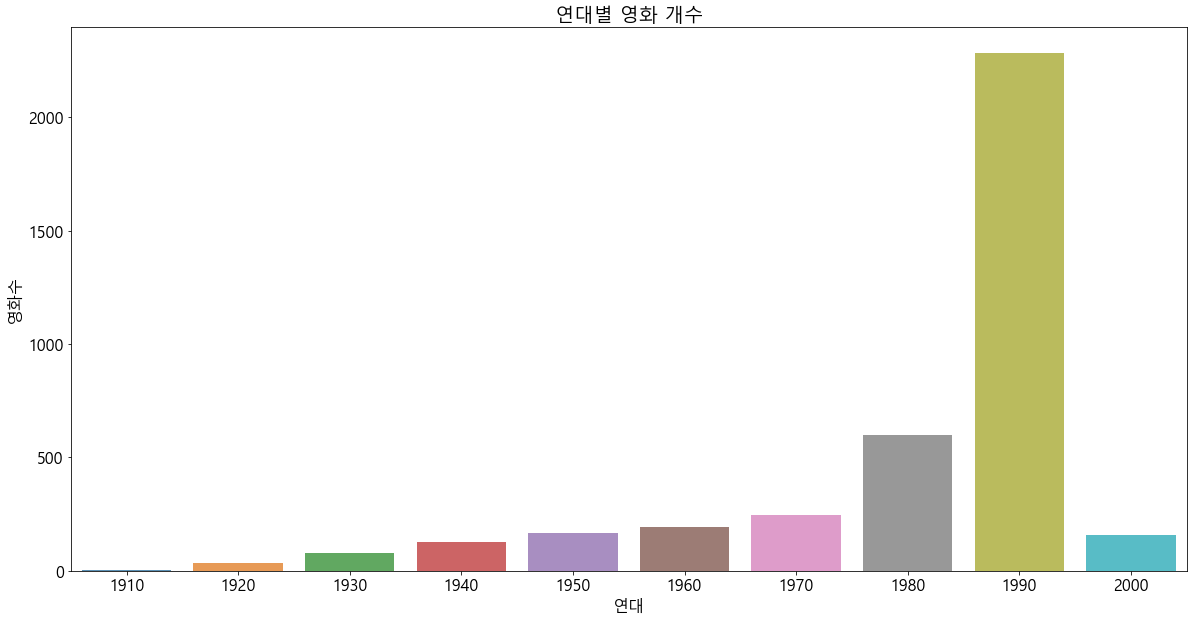

In [23]:
sns.barplot(movie_year_term.index, movie_year_term.values, alpha=0.8)
plt.title('연대별 영화 개수')
plt.xlabel('연대')
plt.ylabel('영화수')
plt.show()